# Introduction

I'll be use the Happy House dataset for this Project, which contains images of peoples' faces. The task will be to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!

# Importing the Required Libraries an Frameworks

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Input, ZeroPadding2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten

# Loading Data and Preprocessing

In [ ]:
#Reading Data Files
train = h5py.File('/content/drive/MyDrive/Happy Model/train_happy.h5', "r")
test = h5py.File('/content/drive/MyDrive/Happy Model/test_happy.h5', "r")

In [ ]:
train.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [ ]:
test.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [ ]:
#Creating the train and test files
x_train = np.array(train['train_set_x'])
y_train = np.array(train['train_set_y'])
x_test = np.array(test['test_set_x'])
y_test = np.array(test['test_set_y'])

print('x train shape is', x_train.shape)
print('y train shape is', y_train.shape)
print('x test shape is', x_test.shape)
print('y test shape is', y_test.shape)

x train shape is (600, 64, 64, 3)
y train shape is (600,)
x test shape is (150, 64, 64, 3)
y test shape is (150,)


In [ ]:
#converting the y from being vectors to array
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print('y train shape is', y_train.shape)
print('y test shape is', y_test.shape)

y train shape is (600, 1)
y test shape is (150, 1)


# Visualizing Some Exanples of the data

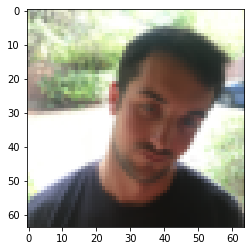

In [ ]:
# Data_visualization
plt.imshow(x_train[0])
plt.show()

In [ ]:
print(y_train[0])

[0]


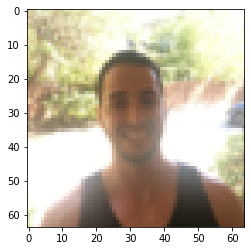

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

[1]




# Model Building

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 

In [ ]:
from keras.engine.input_layer import Input
def happymodel():

  model= Sequential()
  model.add(Input(shape = ((64, 64, 3))))
  model.add(ZeroPadding2D(padding=3))
  model.add(Conv2D(filters=32, kernel_size=(7,7), activation ='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(1, activation ='sigmoid'))


  return model

It's time to check the model's parameters with the .summary() method. This will display the types of layers, the shape of the outputs, and how many parameters are in each layer.

In [ ]:
happy_model = happymodel()
happy_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

In [ ]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Model Training

In [ ]:
history = happy_model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.2379 - val_accuracy: 0.9000
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.9883 - val_loss: 0.1909 - val_accuracy: 0.9267
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0393 - accuracy: 0.9850 - val_loss: 0.5070 - val_accuracy: 0.8533
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9850 - val_loss: 0.1205 - val_accuracy: 0.9533
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0389 - accuracy: 0.9817 - val_loss: 0.5288 - val_accuracy: 0.8600
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.2326 - val_accuracy: 0.9000
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0300 - accuracy: 0.9933 - val_loss: 0.1063 - val_accuracy: 0.9533
Epoch 8/10
38/38 [==

#Model Evaluation

Evaluation by .evaluate(). This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the binary_crossentropy and the accuracy respectively.

In [ ]:
happy_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 17ms/step - loss: 0.1095 - accuracy: 0.9667


[0.10948482155799866, 0.9666666388511658]

# History Object

The history object is an output of the .fit() operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at history.history:

In [ ]:
history.history

{'accuracy': [0.9850000143051147,
  0.9883333444595337,
  0.9850000143051147,
  0.9850000143051147,
  0.9816666841506958,
  0.9933333396911621,
  0.9933333396911621,
  0.9933333396911621,
  0.9950000047683716,
  0.9950000047683716],
 'loss': [0.046829886734485626,
  0.031339239329099655,
  0.039321839809417725,
  0.03828829526901245,
  0.038886550813913345,
  0.02383611910045147,
  0.03004109114408493,
  0.020085589960217476,
  0.017781293019652367,
  0.018071310594677925],
 'val_accuracy': [0.8999999761581421,
  0.9266666769981384,
  0.8533333539962769,
  0.95333331823349,
  0.8600000143051147,
  0.8999999761581421,
  0.95333331823349,
  0.95333331823349,
  0.6466666460037231,
  0.8999999761581421],
 'val_loss': [0.23793309926986694,
  0.1908666342496872,
  0.5069611668586731,
  0.12053024023771286,
  0.5288441181182861,
  0.2325635552406311,
  0.10628391802310944,
  0.1443594992160797,
  1.648687720298767,
  0.31433895230293274]}

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

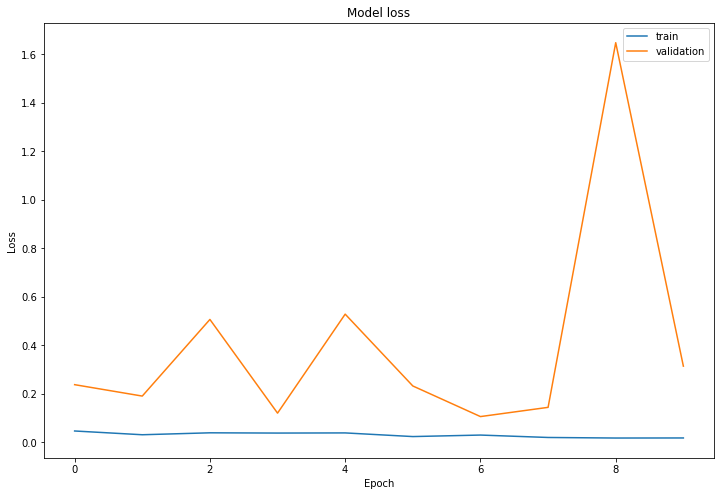

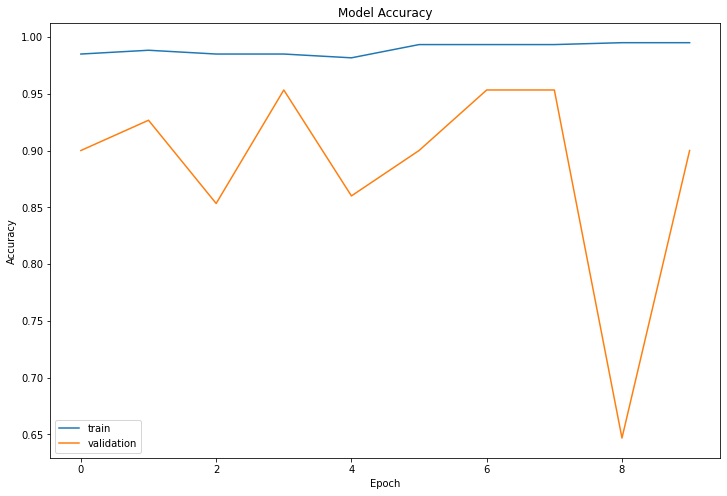

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')